# Raport z analizy danych "Gry na platformie Steam"
## Piotr Gronek, Python i R, Politechnika Gdańska, fizyka techniczna informatyka stosowana studnia II stopnia I semestr 

### Wstęp:
#### Motywacją do pracy nad danymi była chęć pogłębienia wiedzy z programowania związana z językiem Python oraz wspierającymi go środowiskami jak Jupyter, zarówno z nauką możliwości analizy danych o niego opartych. W ciągu ostatniego roku wszystkie projekty które wykonywałem były tworzone za pomocą j.Python i zauważyłem znaczący postęp w jego używaniu. Celem samego projektu jest wykonanie analizy na danych mi bliskich, gdyż interesuję się branżą, oraz rynkiem gier komputerowych. Mam nadzieje, że z przeprowadzonej analizy uda się wyciągnąć jakieś interesujące wnioski. Jednak głównym celem oraz zarówno motywacją jest otrzymanie pozytywnej ocenu z przedmiotu Python i R na studiach.
### Opis danych oraz zmiennych:
#### Dane na których będę operować zostały utworzonę przez użytkownika z 2019-06-12 i pobrane przeze mnie na platformie kaggle, zdecydowałem się je wybrać, ponieważ, możliwe że uda się wyciągnąć z nich interesujące wnioski w trakcie analizy.
#### Dane zawierają:
##### 27076 wierszy danych związanych z pojedyńczymi tytułami gier na platformie Steam
##### 18 kolumn opisujących dany produkt:
##### - appid(int) - Numer, przypisany odpowiednio danemu produktowi. Wartości są wielokrotnością liczby 10 z maksymalną wartością 1 069 460
##### - name(str) - Tytuł produktu 
##### - release_date(YYYY-MM-DD) - Data wydania produktu na paltformie zapisana w formacie 
##### - english(int) - zmienna 0/1 oznaczająca czy dany produkt wspiera język angielski
##### - developer(str) - Firma tworząca produkt
##### - publisher(str) - Wydawca produktu na platformie
##### - platforms(str) - Systemy operacyjne na które produkt został wydany. Mac/Linux/Wndows
##### - required_age(int) - Kategoria wiekowa do której skierowany jest produkt. Przez większość autorów oznaczony jako 0 lub 18.
##### - categories(str) - Kategoria produktu steam, oznaczająca jakie aspekty platformy Steam wspiera produkt.
##### - genres(str) - Gatunek produktu oznaczjący jakiego typu grą w głównym stopniu jest.
##### - steamspy_tags(str) - Oznakowanie produktu na platformie pomagające ją zidentyfikować w oparciu o słowa klucze.
##### - achievements(int) - Liczba osiągnięć wyświetlanych na platformie Steam. możliwa do zbodycia w danym produkcie
##### - positive_ratings(int) - ilość pozytywnych opini wystawionych produktowi przez użytkowników
##### -negative_ratings(int) - Ilość negatywnych opini wystawionych produktowi przez użytkowników
##### -average_playtime(int) - Średni czas gry użytkownika w danych produkt, w minutach
##### -median_playtime(int) - Mediana czasu gry użytkownika w dany produkty, w minutach
##### -owners(int) - Liczba użytkowników platformy Steam posiadających kopie produktu, przybliżone jako przedział.
##### -price(float) - Cena zgodna z datą utworzenia datasetu, w dolarach

### Opis procesu przygotowań danych do analizy i modelowania. 
### Dane na których przeprowadzono badania są względnie "czyste" wszystkie nieporządane bądź puste rekordy będą osobno czyszczone przy danych badaniach. Jedynym dotychczas napotkanym problem jest fakt, że nie wszystkie produkty są śledzone przez aplikacjie SteamSpy z które owe dane pochodzą. Co oznacza że ich mediana oraz średnia godzin wynosi 0, oznaczając brak danych na temat produktu.
### W ramach rozpoczęcia analizy należy utworzyć pytania badawcze na którę odpowiedź chcemy poznać w trakcie prowadzenia badań nad danym zbiorem(nie są one puokładane według złożoności):
####  1.W jak dużej ilości produktów występują tzw, dedykowani gracze którzy zawyżają średnią czasu gry
####  2.Ile kopi dowolnych porduktów przypada na jedno konto na platformie Steam ( zgodnie z danymi z 2019 roku przypuszczamy że kont na platformie jest miliard)
####  3.Czy można wywnioskować że cena produktu ma istotny wpływ na ilość negatywnych opinii na jego temat, pytanie uzasadniam wyższymi wymogami względem produktu który ma wysoką cenę.
####  4.Najlepsze firmy w kwesti średniej sprzedaży kopi produktu względem ilości produktów
####  5.Jakie gatunki produktów przyciągają najwięcej użytkowników
####  6.Badanie negatywnych i pozytywnych ocen na platformie
####  7.Sumaryczne dane na temat systemów operacyjnych na które wydawane były produkty
### Starając się odpowiedzieć na powyższe pytania będę korzystał obranej metodologi pracy z danymi. Polegającej na wybraniu odpowiednich danych z całej bazy, następnie unormowaniu jej do wartości które są optymalne do przeprowadzenia analizy. Mając finalną strukture danych, poza operacjami sortowania oraz obliczeniami matematycznymi, będą na nich przeprowadzane budowy wykresów statystycznych oraz modele regresji liniowej pozwalajacej na odczyt odpowiednich informacji.

# Początek analizy

In [2]:
# Implementacja wymaganych bibliotek do obródki danych
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Wczytanie danych do badania jako dataframe
df = pd.read_csv('steam.csv')  

In [3]:
display(df)

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher          platforms  \
0                   Valve                 Valve  windows;mac;linux   
1                   Valve                 Valve  windows;mac;linux   
2                   Valve                 Valve  windows;mac;linux   
3                   Valve                 Valve  windows;mac;linux   
4        Gearbox Software                 Valve  windows;mac;linux   
...                   ...                   ...                ...   
27070         SHEN JIAWEI           SHEN JIAWEI            windows   
27071      Semyon Maximov      BekkerDev Studio            windows   
27072         EntwicklerX           EntwicklerX            windows   
27073  Yustas Game Studio  Alawar Entertainment        windows;mac   
27074    Adept Studios GD  Alawar Entertainment        windows;mac   

       required_age                                         categories  \
0                 0  Multi-player;Online Multi-Player;Local Multi-P...   
1                 0  Multi-player;Online Multi-Player;Local Multi-P...   
2                 0              Multi-player;Valve Anti-Cheat enabled   
3                 0  Multi-player;Online Multi-Player;Local Multi-P...   
4                 0  Single-player;Multi-player;Valve Anti-Cheat en...   
...             ...                                                ...   
27070             0                   Single-player;Steam Achievements   
27071             0                                      Single-player   
27072             0  Single-player;Multi-player;Co-op;Shared/Split ...   
27073             0                          Single-player;Steam Cloud   
27074             0                          Single-player;Steam Cloud   

                       genres                 steamspy_tags  achievements  \
0                      Action        Action;FPS;Multiplayer             0   
1                      Action        Action;FPS;Multiplayer             0   
2                      Action  FPS;World War II;Multiplayer             0   
3                      Action        Action;FPS;Multiplayer             0   
4                      Action             FPS;Action;Sci-fi             0   
...                       ...                           ...           ...   
27070  Adventure;Casual;Indie        Adventure;Indie;Casual             7   
27071  Action;Adventure;Indie        Action;Indie;Adventure             0   
27072     Action;Casual;Indie           Action;Indie;Casual            24   
27073  Adventure;Casual;Indie        Indie;Casual;Adventure             0   
27074  Adventure;Casual;Indie        Indie;Casual;Adventure             0   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
0                124534              3339             17612              317   
1                  3318               633               277               62   
2                  3416               398               187               34   
3                  1273               267               258              184   
4                  5250               288               624              415   
...                 ...               ...               .

## Badanie 1.

In [4]:
colAvgToDict = df['average_playtime'].to_dict()
colMedianToDict = df['median_playtime'].to_dict()

In [5]:
tempAvg = []
tempMedian = []
#W trakcie badania okazało się ze produkty znacząco wychodza poza skale badania
for k,v in colAvgToDict.items():
    temp = []
    temp.append(k)
    temp.append(v)
    tempAvg.append(temp)
for k,v in colMedianToDict.items():
    temp = []
    temp.append(k)
    temp.append(v)
    tempMedian.append(temp)

<function matplotlib.pyplot.show(close=None, block=None)>

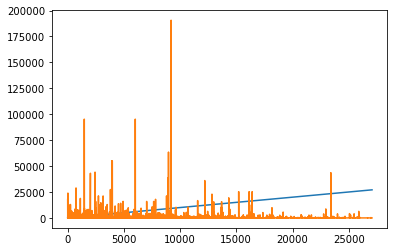

In [6]:
plt.plot(tempAvg)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

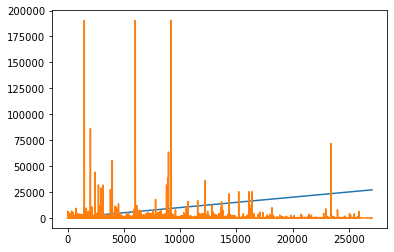

In [7]:
plt.plot(tempMedian)
plt.show

In [8]:
finalAvg =[]
finalMedian =[]
for i in range(len(tempAvg)):
    if tempAvg[i][1] > tempMedian[i][1] and tempAvg[i][1] > 0 and tempAvg[i][1] != tempMedian[i][1]:
        finalAvg.append(tempAvg[i][1]) 
        finalMedian.append(tempMedian[i][1])   
print(f"Ilość błędynch rekordów odnoszących się do średniego czasu rozgrywki w dany produkt:{len(tempAvg)-len(finalAvg)}")
print(f"Ilość błędynch rekordów odnoszących się do mediany czasu rozgrywki w dany produkt:{len(tempMedian)-len(finalMedian)}")
if len(finalAvg) == len(finalMedian):
    print("Można przypuścić że operacja usówania błędnych danych powiodła się," 
          "powyższe błędy wywodza się prawdopodobnie z błędu popełnionego przez aplikacje SteamSpy"
          "bądź są to produkty w których większość populacji to BOT-y")

Ilość błędynch rekordów odnoszących się do średniego czasu rozgrywki w dany produkt:26333
Ilość błędynch rekordów odnoszących się do mediany czasu rozgrywki w dany produkt:26333
Można przypuścić że operacja usówania błędnych danych powiodła się,powyższe błędy wywodza się prawdopodobnie z błędu popełnionego przez aplikacje SteamSpybądź są to produkty w których większość populacji to BOT-y


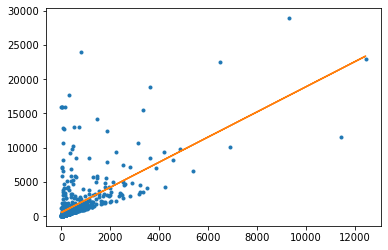

In [9]:
m,b = np.polyfit(finalMedian,finalAvg,1)
plt.plot(finalMedian, finalAvg, '.')
finalMedian = np.array(finalMedian)
plt.plot(finalMedian, b + m * finalMedian, '-')
plt.show()

In [10]:
count = 0
for i in range(len(finalAvg)):
    if finalAvg[i] > finalMedian[i]*10:
        count = count + 1
print(count)

59


## Wnioski z badania 1.
### Niestety, moim zdaniem, wniosek z badania odnośnie zawyżania średniej przez jednostki jest dosyć niesatysfakcjonujący.
### W przeprowadzonym badaniu w ramach oczyszczenia danych przyjęto że 
### wartość średniej oraz mediany nie może być równa 0
### wartość średniej powinna być wyższa od mediany 
### indeksy obu grup muszą być identyczne dla wiarygodności badania
## W trakcie zbierania finalnej grupy danych do badania ilość badanaych spadła do ~3% całej populacji co znacząco zaburza idee badania
### Jednakże mimo tego wyciągając wnioski z posiadanej bazy dla tego zbioru, otrzymaliśmy 742 produkty dla których średnia jest wyższa od mediany w tym 59 produktów dla których średnia jest conajmniej 10 krotnie wyższa niż mediana. Oznaczałoby to, że dla tych produktów część użytkowników znacząco przewyższa czasem spędzonym w grze innych, stąd powstała statystyka. 
#### Przykładem takiego produktu jest gra Counter Strike 1.6 dla której mediana wynosi 5.28h przy średniej 293,5h

## Badanie 2.

In [11]:
owners = df['owners'].to_dict()
overallOwners = []
for k,v in owners.items():
    v = v.split("-")
    overallOwners.append(0.75*int(v[1]))
sumOfOwners = 0
for e in overallOwners:
    sumOfOwners = sumOfOwners + e

numberOfAccounts = 1000000000
howMany = sumOfOwners/numberOfAccounts
print(howMany)


3.8186775


## Wnioski z badania 2.
### Badanie to było bardzo proste, lecz wniosek jest jak najbardziej satysfakcjonujący i uzasadniony.
### W przeprowadzonym badaniu policzono ogólną sume średniej ilości użytkowników na produkt.
### Następnie na jej podstawie wyliczono ile gier przypada na jedno konto na platformie Steam. Otrzymany wynik wynosi ~3.8 gier na pojedyńcze konto zgodnie z danymi z 2019 roku. Biorąc pod uwagę, że w tym samym roku wykryto 90mln aktywnych unikatowych użytkowników, można wyciągnąc z tego wnioski, że znacząca większość kont istniejących na Steamie to konta puste bądź, z jedną grą. Przypuszczając, że aktywny użytkownik posiada tych gier conajmniej kilka.
### Powyższe zjawisko, może być wywołane:
#### Karami nakładanymi przez steam na użytkowników którzy złamali w jakiś sposób umowe ze Steam, po czym założyli nowe konto.(Ban nie usuwa konta użytkownika)
#### Zakładaniem przez użytkowników kont śmieciowych służących do wymian na rynku.
#### Zakładaniem przez użytkowników kolejnych kont do grania w ich ulubiony tytuł MultiPlayer w celu tzw. Smurfingu (Posiadania umiejętności na znacznie wyższym poziomie niż poziom oponentów dobieranych do nowego konta)
#### Kradzieżą konta bądź potrzebą utworzenia nowego po latach gdy nie pamięta się zupełenie danych poprzedniego.

## Badanie 3.

In [12]:
price = df['price'].to_dict()
rating = df['negative_ratings'].to_dict()
tempPrice = []
tempRating = []
for k,v in price.items():
    temp = []
    temp.append(k)
    temp.append(v)
    tempPrice.append(temp)
for k,v in rating.items():
    temp = []
    temp.append(k)
    temp.append(v)
    tempRating.append(temp)


In [13]:
#Usuwamy gry darmowe w celu pracy tylko na tytułach za które trzeba płacić,także tytuły nie 
#posiadające negatywnego ratingu z powodu ich niskiej popularności mogłyby zakłucić wynik badania
finalPrice = []
finalRating = []
for i in range(len(tempPrice)):
    if tempPrice[i][1] > 0 and tempRating[i][1] >0 :
        finalPrice.append(tempPrice[i][1]) 
        finalRating.append(tempRating[i][1])   

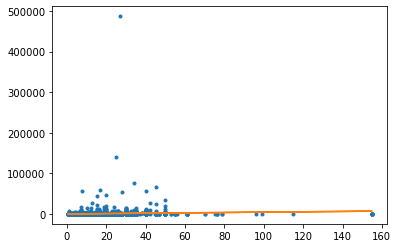

In [14]:
m,b = np.polyfit(finalPrice,finalRating,1)
plt.plot(finalPrice, finalRating, '.')
finalPrice = np.array(finalPrice)
plt.plot(finalPrice, b + m * finalPrice, '-')
plt.show()

### Dane należy poprawić w celu wyciągniecia wniosków, na ten moment widzimy kilka punktów oddalonych, oraz że produkty o cenie wyższej niz 50$ mają raczej niską ilość negatywnych ocen

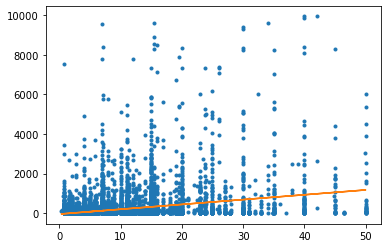

In [15]:
finalPrice = []
finalRating = []
for i in range(len(tempPrice)):
    if 50 > tempPrice[i][1] > 0 and (10000 >tempRating[i][1] >0) :
        finalPrice.append(tempPrice[i][1]) 
        finalRating.append(tempRating[i][1])   
        
m,b = np.polyfit(finalPrice,finalRating,1)
plt.plot(finalPrice, finalRating, '.')
finalPrice = np.array(finalPrice)
plt.plot(finalPrice, b + m * finalPrice, '-')
plt.show()

[0, 84870, 56858, 145819, 61991, 55289, 212166, 134146, 42027, 89363, 153720, 75975, 30495, 25520, 275485, 133905, 23031, 9577, 39055, 138520, 2493, 1669, 52054, 52921, 78449, 41450, 12309, 5987, 0, 113459, 4614, 2750, 8954, 18548, 71291, 438, 11, 4631, 2486, 88794, 0, 12823, 0, 0, 36049, 0, 105, 0, 0]
[0, 2340, 2057, 2966, 1470, 1246, 2115, 1278, 308, 558, 980, 709, 128, 154, 768, 557, 38, 43, 123, 218, 5, 5, 137, 124, 88, 20, 34, 27, 0, 138, 35, 5, 14, 9, 58, 1, 1, 3, 1, 70, 0, 3, 0, 0, 29, 0, 5, 0, 0]
18868
2400097


<function matplotlib.pyplot.show(close=None, block=None)>

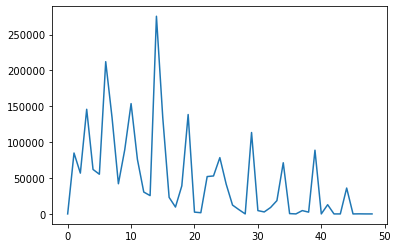

In [16]:
countNegatives = [0 for i in range(1,50)]
countNumberOfProducts = [0 for i in range(1,50)]
sumOfProducts = 0
sumOfNegatives = 0
for i in range(len(finalPrice)):
    for j in range(1,50):
        try:
            if j < finalPrice[i] < j+1:
                countNegatives[j] = countNegatives[j] + finalRating[i]
                countNumberOfProducts[j] = countNumberOfProducts[j] + 1
                sumOfProducts = sumOfProducts + 1
                sumOfNegatives = sumOfNegatives + finalRating[i]
        finally:
            continue
print(countNegatives)
print(countNumberOfProducts)
print(sumOfProducts)
print(sumOfNegatives)
plt.plot(countNegatives)
plt.show

In [17]:
plt.scatter(countNumberOfProducts,countNegatives)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

## Wnioski z badania 3.
### Badanie przebiegło tak jak się spodziewałem. Statystyka ceny jest dosyć małym czynnikiem żeby wyciągnąć wiele wniosków na temat produktu. Można zauważyć jednak, że największe zgrupowanie negatywnych opini, włącznie z ich wysokimi wartościami, występuje w okolicy 5 i 15 dolarów z wykresu punktowego oraz po zliczeniu dokładnej ilości produktów na przedział, widać że nie jest to tylko wywołane wysoką ilością produktów o danej cenie.
### Dla produktów w okolicy ceny 5 i 15 dolarów kolejno wyliczono 2115 i 768 porduktów posiadających 212166 i 275485 negatywnych ocen
### Jeżeli przyjżymy się wartości 15 dolarów, można zauważyć, że 11.5% wszystkich negatywnych ocen naszego zbioru zostało zebrane przez 4% całej populacji. Może być to wywołane, że jest to cena graniczna. Wszystko co droższe wydaje się drogie wszystko co tansze wydaje się tanie. Użytkownicy wydający powyższą sumę za produkt mają oczekiwania które jak widać z ich opini często nie zostają spełnione.


##  Badanie 4.

In [82]:
developers = df['developer'].to_dict()
owners = df['owners'].to_dict()
tempDevelopers = []
tempOwners = []
for k,v in developers.items():
    temp = []
    temp.append(k)
    temp.append(v)
    tempDevelopers.append(temp)
for k,v in owners.items():
    temp = []
    temp.append(k)
    temp.append(v)
    tempOwners.append(temp)

finalOwners = []
for k,v in tempOwners:
    v = v.split("-")
    finalOwners.append(0.75*int(v[1]))
    


In [125]:
#17113 to liczba unikatowych firm/podfirm wyliczona osobno
DevProducts = [[0 for i in range(17113)],[0 for i in range(17113)],[0 for i in range(17113)]]
for i in range(len(tempDevelopers)):
    for j in range(len(DevProducts[0])):
        if tempDevelopers[i][1] == DevProducts[0][j]:
            DevProducts[1][j] = DevProducts[1][j] + 1
            DevProducts[2][j] = DevProducts[2][j] + finalOwners[i]
            break
        elif DevProducts[0][j] == 0:
            DevProducts[0][j] = tempDevelopers[i][1]
            DevProducts[1][j] = DevProducts[1][j] + 1
            DevProducts[2][j] = DevProducts[2][j] + finalOwners[i]
            break
 

In [153]:
df = pd.DataFrame(list(zip(DevProducts[0], DevProducts[1],DevProducts[2])),
               columns =['company', 'products','users'])
df = df.set_index(["company"])
df

products        users
company                                               
Valve                                  26  408750000.0
Gearbox Software                        7   17700000.0
Valve;Hidden Path Entertainment         1   75000000.0
Mark Healey                             1      37500.0
Tripwire Interactive                    5   12015000.0
...                                   ...          ...
MonteCube                               1      15000.0
Velvet Paradise Games                   1      15000.0
SHEN JIAWEI                             1      15000.0
Semyon Maximov                          1      15000.0
Adept Studios GD                        1      15000.0

[17113 rows x 2 columns]

In [154]:
df = df.sort_values("users",ascending=False).head(10)
display(df)

products        users
company                                               
Valve                                  26  408750000.0
Valve;Hidden Path Entertainment         1   75000000.0
PUBG Corporation                        1   75000000.0
Digital Extremes                        3   39075000.0
Bethesda Game Studios                  10   37800000.0
Smartly Dressed Games                   1   37500000.0
Facepunch Studios                       4   22530000.0
Ubisoft Montreal                       19   20430000.0
Bohemia Interactive                    16   20205000.0
Gearbox Software                        7   17700000.0

In [155]:
df = (df["users"]/df["products"]).sort_values(ascending=False)

<AxesSubplot:xlabel='company'>

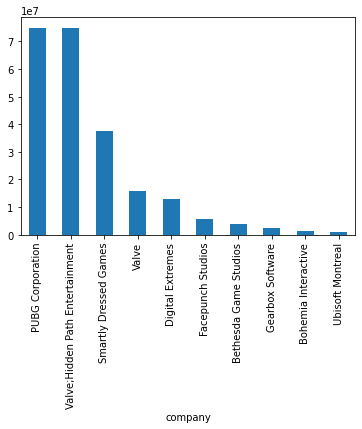

In [156]:
df.plot(kind = "bar")

## Wnioski z badania 4.
### W badaniu zliczyliśmy firmy oraz podfirmy występujące w bazie i przypisaliśmy każdej z nich ilość produktów oraz użytkowników którzy nabyli ich produkty. Nastepnie wyznaczyliśmy średnią wartość ilości użytkowników na produkt danej firmy. Jak odrazu widać, można by wykonać osobne badanie dla firm które mają X > 1 produktów gdyż firmy które odniosły sukces tworząc jedną grę są na szczycie naszego wykresu Top10. Niezależnie jednak od tego dane udało się prawidłowo wydzielić i utworzyć oczekiwany wykres.

## Badanie 5.
### W ramach ułatwienia przyjmujemu że multi-gatunkowy produkt ma swój specjalny gatunek. Inaczej należałoby znaleźć jak rozdzielić produkt mający X użytkowników i jest krzyżówką 3 gatunków.

In [172]:
genres = df['genres'].to_dict()
owners = df['owners'].to_dict()
tempGenres = []
tempOwners = []
for k,v in genres.items():
    temp = []
    temp.append(k)
    temp.append(v)
    tempGenres.append(temp)
for k,v in owners.items():
    temp = []
    temp.append(k)
    temp.append(v)
    tempOwners.append(temp)

finalOwners = []
for k,v in tempOwners:
    v = v.split("-")
    finalOwners.append(0.75*int(v[1]))

In [176]:
tempGenres[88][1]

'Adventure;Casual'

In [198]:
usersPerGenre = [[0 for i in range(1552)],[0 for i in range(1552)],[0 for i in range(1552)]]

for i in range(len(tempGenres)):
    for j in range(len(usersPerGenre[0])):
        if tempGenres[i][1] == usersPerGenre[0][j]:
            usersPerGenre[1][j] = usersPerGenre[1][j] + finalOwners[i]
            usersPerGenre[2][j] = usersPerGenre[2][j] +1
            break
        elif usersPerGenre[0][j] == 0:
            usersPerGenre[0][j] = tempGenres[i][1]
            usersPerGenre[1][j] = usersPerGenre[1][j] + finalOwners[i]
            usersPerGenre[2][j] = usersPerGenre[2][j] +1
            break

In [200]:
df = pd.DataFrame(list(zip(usersPerGenre[0], usersPerGenre[1],usersPerGenre[2])),
               columns =['Genre', 'Owners','Products'])
df = df.set_index(["Genre"])
df

Owners  Products
Genre                                                                    
Action                                              535987500.0       843
Action;Free to Play                                 218055000.0        40
Action;Free to Play;Strategy                        152512500.0         8
Action;Adventure                                    192577500.0       363
Indie                                                31740000.0       759
...                                                         ...       ...
Action;Adventure;Casual;Free to Play;Massively ...      15000.0         1
Action;Free to Play;Indie;Massively Multiplayer...     150000.0         1
Action;Adventure;Indie;Massively Multiplayer;RP...      15000.0         1
Action;Adventure;Casual;Free to Play;Indie;RPG;...      15000.0         1
Casual;Free to Play;Massively Multiplayer;RPG;E...      15000.0         1

[1552 rows x 2 columns]

Owners  Products
Genre                                                            
Action                                      535987500.0       843
Action;Free to Play                         218055000.0        40
Action;Adventure                            192577500.0       363
Action;Free to Play;Strategy                152512500.0         8
Strategy                                    136417500.0       485
Action;Indie                                124717500.0      1852
Action;Adventure;Indie                      103957500.0      1229
RPG                                          95662500.0       270
Adventure;Indie                              94575000.0      1170
Action;RPG                                   84345000.0        98
Action;Adventure;Massively Multiplayer       78930000.0         6
Action;Free to Play;Indie                    62220000.0       105
Casual;Indie                                 52755000.0      1482
Simulation;Strategy                          49710000.0       175
Adventure;Casual;Indie                       49515000.0       801
Indie;Simulation                             49012500.0       218
Action;Adventure;Indie;RPG                   48840000.0       330
Action;Casual;Indie                          46822500.0      1004
Adventure                                    39780000.0       535
Action;Free to Play;Massively Multiplayer    38550000.0        17
Action;Adventure;Casual;Free to Play;Indie   37957500.0        14
Action;Indie;Strategy                        34260000.0       220
Indie;Simulation;Strategy                    32332500.0       231
Indie                                        31740000.0       759
Indie;Strategy                               30652500.0       364

<AxesSubplot:xlabel='Genre'>

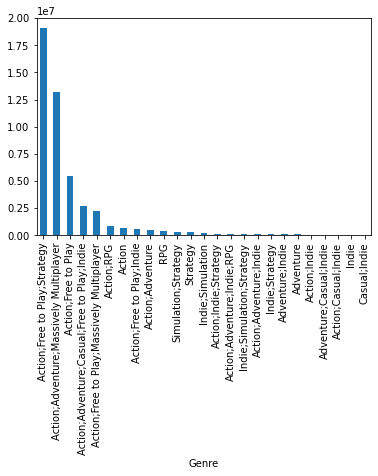

In [202]:
df = df.sort_values("Owners",ascending=False).head(25)
display(df)
df = (df["Owners"]/df["Products"]).sort_values(ascending=False)
df.plot(kind = "bar")

## Wnioski z badania 5.
### Badanie to ze struktury obliczeniowej było praktycznie identyczne jak badanie 4-te. Odnośnie wniosków z naszej bazy możemy odczytać że:
### Najwięcej użytkowników przyciąga kategoria Akcji niezależnie od tego jakiego podtypu jest.
### Po wyliczeniu ilości użytkowników pojedyńczy produkt z danego gatunku, czołówka statystyki jest zdominowana przez przez produkty Free-To-Play. Co wydaje się jasne ponieważ dużo użytkowników pobiera produkt i używa przez przeważnie czas bardzo krótki, ale jednak go pobrało.

## Badanie 6.
### W trakcie pracy nad tym punktem zdałem sobie sprawe że dla ułatwiena pracy przy potrzebie wyizolowania małej ilości danych powinienem najpierw je wyznaczyć następnie na nich pracować, mógłbym zmienić to w przypadku wcześniejszego top10, ale warto widzieć proces nauki przez prace.

In [8]:
df = pd.read_csv('steam.csv')  
df = df.sort_values("positive_ratings",ascending=False).head(25)

In [98]:
positiveRatings = df['positive_ratings'].to_dict()
owners = df['owners'].to_dict()
negativeRatings = df['negative_ratings'].to_dict()
tempPositiveRatings = []
tempOwners = []
tempNegativeRatings = []

for k,v in positiveRatings.items():
    temp = []
    tempPositiveRatings.append(v)
for k,v in owners.items():
    temp = []
    temp.append(k)
    temp.append(v)
    tempOwners.append(temp)
for k,v in negativeRatings.items():
    temp = []
    tempNegativeRatings.append(v)

finalOwners = []
for k,v in tempOwners:
    v = v.split("-")
    finalOwners.append(0.75*int(v[1]))

In [103]:
indexes = []
for i,v in tempOwners:
    indexes.append(i)

<AxesSubplot:xlabel='ID'>

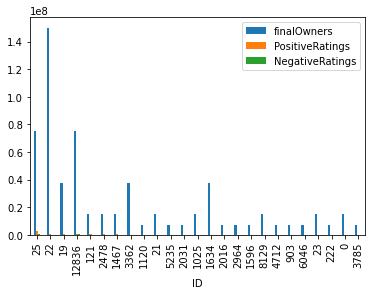

In [100]:
data = {"finalOwners":finalOwners,"PositiveRatings":tempPositiveRatings,"NegativeRatings":tempNegativeRatings,"ID":indexes}

data = pd.DataFrame(data)

data.plot(x="ID", y=["finalOwners", "PositiveRatings", "NegativeRatings"], kind="bar")

<AxesSubplot:xlabel='ID'>

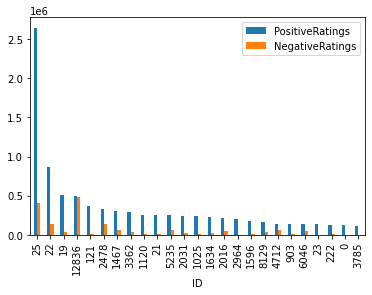

In [101]:
data.plot(x="ID", y=[ "PositiveRatings", "NegativeRatings"], kind="bar")

In [112]:
sumOfOwners = 0
sumOfRatings = 0
for e in finalOwners: sumOfOwners = sumOfOwners + e 
for e in tempNegativeRatings: sumOfRatings = sumOfRatings + e 
for e in tempPositiveRatings: sumOfRatings = sumOfRatings + e 
print(sumOfOwners,sumOfRatings)
print(sumOfRatings/sumOfOwners*100)

615000000.0 10666136
1.734331056910569


## Wnioski z badania 6.
### W ramach badania wybrałem 25 najbardziej popularnych produktów na rynku. Większość z wybranych produktów stosunek jakichkolwiek ocen ma względnie mały w stosunku do posiadaczy. Jak wynikło z obliczeń dla tej grupy około 1.7% posiadaczy produktu zdecydowało się na wystawienie jakiejkolwiek opini produktowi. Jedyny ciekawey przypadek to produkt o którym było głośno w latach 2017-2019, o ID 12836 jest to produkt PlayerUnknown'sBattlegrounds. Zgodnie w wykresem na tle posiadaczy ilość opini nadal jest nieznacząca, lecz widzimy praktycznie stosunek 1:1 jeżeli chodzi o ilość negatywnych do pozytywnych opinii o tym produkcie.

## Badanie 7.

In [134]:
df = pd.read_csv('steam.csv')  
platforms = df['platforms'].to_dict()
platformsValues = [0,0,0]
for k,v in platforms.items():
    temp = v.split(";")
    try:
        if temp[0] == "windows":
            platformsValues[0] = platformsValues[0] +1
        if temp[1] == "mac":
            platformsValues[1] = platformsValues[1] +1
        if temp[1] == "linux":
            platformsValues[2] = platformsValues[2] +1
        if temp[2] == "linux":
            platformsValues[2] = platformsValues[2] +1
    finally:
        continue
platformsValues   

[27070, 8062, 5234]

## Wnioski z badania 7.
### Na sam koniec bardzo proste badanie z czystej ciekawości policzyłem ile produktów na jakie platformy zostaje wydane. Mając świadomość jak bardzo popularny jest system windows. 
###  100% gier na platformie Steam jes tkompatybilna z systemem WIndows
### ~30% gier na platformie Steam jes tkompatybilna z systemem Mac
### ~19% gier na platformie Steam jes tkompatybilna z systemem Linux